In [ ]:
from google.colab import userdata
username = userdata.get('KAGGLE_USER')
key = userdata.get('KAGGLE_KEY')
# Echo the credentials into the kaggle.json file
!mkdir -p ~/.kaggle
!echo '{{"username":"{username}","key":"{key}"}}' > ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c hackathon-online-io-ts-and-robotics-ss-4

  0% 0.00/263k [00:00<?, ?B/s]
100% 263k/263k [00:00<00:00, 117MB/s]


In [ ]:
!unzip /content/hackathon-online-io-ts-and-robotics-ss-4.zip

Archive:  /content/hackathon-online-io-ts-and-robotics-ss-4.zip
  inflating: IOT_Submit.csv          
  inflating: IOT_Test.csv            
  inflating: IOT_Train.csv           


In [ ]:
!pwd

/project/lt900223-ai24xw/scripts


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv("/project/lt900223-ai24xw/scripts/finalhack/datasets/iot/IOT_Train.csv")
train_df

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-14 01:00:00+07:00,97.9,0.0,NaN,NaN,4.2,0.0,0.0,23.5
13631,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-03 02:00:00+07:00,80.6,0.0,NaN,NaN,0.0,135.0,2.9,19.3
13632,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-19 06:00:00+07:00,87.9,37.0,NaN,NaN,0.0,45.0,3.0,24.5
13633,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-15 02:00:00+07:00,89.9,0.0,NaN,NaN,0.0,315.0,0.0,27.3


In [ ]:
train_df.isnull().sum()

mac                 0
station_name        0
tambon_code         0
tambon_namt         0
amphur_code         0
amphur_namt         0
province_code       0
province_namt       0
latitude            0
longitude           0
time                0
humid               0
light               0
pm10             6794
pm2.5            6794
rainfall            0
wind_direct         0
wind_speed          0
temp                1
dtype: int64

In [ ]:
train_df.describe()

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
count,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,6841.000000,6841.000000,13635.000000,13635.000000,13635.000000,13634.000000
mean,452665.897543,4526.625376,45.179391,15.498114,101.728711,80.428258,33.196553,7.657652,6.449203,0.135827,161.854785,4.533869,29.083827
std,213925.103701,2139.240731,21.448269,2.345306,2.180078,12.442925,34.509041,8.449023,8.415738,1.112371,100.338928,181.668659,4.344476
min,102601.000000,1026.000000,10.000000,10.579849,98.573417,40.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.200000
25%,300903.000000,3009.000000,30.000000,14.533026,100.569662,71.000000,0.000000,3.000000,2.000000,0.000000,45.000000,0.000000,25.800000
50%,380704.000000,3807.000000,38.000000,16.494229,102.052114,82.400000,16.000000,6.000000,4.000000,0.000000,180.000000,1.400000,28.100000
75%,550404.000000,5504.000000,55.000000,18.142499,104.350891,90.600000,68.000000,10.000000,9.000000,0.000000,225.000000,3.400000,31.700000
max,860206.000000,8602.000000,86.000000,18.241106,104.495172,100.000000,96.000000,368.000000,368.000000,34.100000,337.500000,15094.300000,51.100000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635 entries, 0 to 13634
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mac            13635 non-null  object 
 1   station_name   13635 non-null  object 
 2   tambon_code    13635 non-null  int64  
 3   tambon_namt    13635 non-null  object 
 4   amphur_code    13635 non-null  int64  
 5   amphur_namt    13635 non-null  object 
 6   province_code  13635 non-null  int64  
 7   province_namt  13635 non-null  object 
 8   latitude       13635 non-null  float64
 9   longitude      13635 non-null  float64
 10  time           13635 non-null  object 
 11  humid          13635 non-null  float64
 12  light          13635 non-null  float64
 13  pm10           6841 non-null   float64
 14  pm2.5          6841 non-null   float64
 15  rainfall       13635 non-null  float64
 16  wind_direct    13635 non-null  float64
 17  wind_speed     13635 non-null  float64
 18  temp  

In [ ]:
train_df["time"] = pd.to_datetime(train_df["time"])

In [ ]:
print(train_df['tambon_namt'].unique())
print(train_df['amphur_namt'].unique())
print(train_df['province_namt'].unique())
print(train_df['station_name'].unique())

['กำปัง' 'นาสะแบง' 'บักดอง' 'ท่าข้าม' 'สถาน' 'แม่สอด' 'ดินแดง'
 'หนองสูงเหนือ']
['โนนไทย' 'ศรีวิไล' 'ขุนหาญ' 'ท่าแซะ' 'นาน้อย' 'แม่สอด' 'ดินแดง' 'หนองสูง']
['นครราชสีมา' 'บึงกาฬ' 'ศรีสะเกษ' 'ชุมพร' 'น่าน' 'ตาก' 'กรุงเทพมหานคร'
 'มุกดาหาร']
['บ้านนา_2' 'บ้านนาสะแบง_2' 'บ้านสำโรงเกียรติ_2' 'โรงเรียนท่าข้ามวิทยา'
 'โรงเรียนบ้านนา' 'โรงเรียนสรรพวิทยาคม'
 'โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล)' 'โรงเรียนหนองสูงสามัคคีวิทยา_2']


In [ ]:
# tambon_id_map = {'กำปัง': 1, 'นาสะแบง': 2, 'บักดอง':3, 'ท่าข้าม':4, 'สถาน':5, 'แม่สอด':6, 'ดินแดง':7 ,'หนองสูงเหนือ':8} # Create mapping
# amphur_id_map = {'โนนไทย' :9, 'ศรีวิไล':10,'ขุนหาญ':11, 'ท่าแซะ' :12, 'นาน้อย': 13,'แม่สอด':14, 'ดินแดง': 15 ,'หนองสูง':16}  # Create mapping for amphur
# province_id_map = {'นครราชสีมา':17, 'บึงกาฬ':18, 'ศรีสะเกษ':19, 'ชุมพร' :20,'น่าน':21, 'ตาก' :22, 'กรุงเทพมหานคร':23,'มุกดาหาร':24}  # Create mapping for province

# train_df['tambon_namt'] = train_df['tambon_namt'].map(tambon_id_map)
# train_df['amphur_namt'] = train_df['amphur_namt'].map(amphur_id_map)
# train_df['province_namt'] = train_df['province_namt'].map(province_id_map)

# train_df

In [ ]:
# # Change these columns values to a numeric type
# train_df[['tambon_namt', 'amphur_namt', 'province_namt']] = train_df[['tambon_namt', 'amphur_namt', 'province_namt']].apply(pd.to_numeric)

# train_df.info()

In [ ]:
station_id_map = {'บ้านนา_2':1111, 'บ้านนาสะแบง_2':2222 ,'บ้านสำโรงเกียรติ_2':3333 ,'โรงเรียนท่าข้ามวิทยา':4444,
                  'โรงเรียนบ้านนา' :5555,'โรงเรียนสรรพวิทยาคม':6666,'โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล)':7777, 'โรงเรียนหนองสูงสามัคคีวิทยา_2':8888}

train_df['station_name'] = train_df['station_name'].map(station_id_map)
train_df = train_df.rename(columns={'station_name':'station_id'})
train_df

,mac,station_id,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-14 01:00:00+07:00,97.9,0.0,NaN,NaN,4.2,0.0,0.0,23.5
13631,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-03 02:00:00+07:00,80.6,0.0,NaN,NaN,0.0,135.0,2.9,19.3
13632,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-19 06:00:00+07:00,87.9,37.0,NaN,NaN,0.0,45.0,3.0,24.5
13633,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-15 02:00:00+07:00,89.9,0.0,NaN,NaN,0.0,315.0,0.0,27.3


In [ ]:
set(train_df.columns)

{'amphur_code',
 'amphur_namt',
 'humid',
 'latitude',
 'light',
 'longitude',
 'mac',
 'pm10',
 'pm2.5',
 'province_code',
 'province_namt',
 'rainfall',
 'station_id',
 'tambon_code',
 'tambon_namt',
 'temp',
 'time',
 'wind_direct',
 'wind_speed'}

In [ ]:
train_df = train_df.drop(columns=['mac', 'amphur_namt','pm10','pm2.5','province_namt', 'tambon_namt'])
train_df.head()

,station_id,tambon_code,amphur_code,province_code,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed,temp
0,1111,300903,3009,30,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,0.0,45.0,4.3,32.6
1,1111,300903,3009,30,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,0.0,45.0,1.9,37.9
2,1111,300903,3009,30,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,0.0,135.0,3.2,26.4
3,1111,300903,3009,30,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,0.0,157.5,0.0,25.6
4,1111,300903,3009,30,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,0.0,180.0,2.3,36.2


In [ ]:
len(train_df)

13635

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635 entries, 0 to 13634
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype                    
---  ------         --------------  -----                    
 0   station_id     13635 non-null  int64                    
 1   tambon_code    13635 non-null  int64                    
 2   amphur_code    13635 non-null  int64                    
 3   province_code  13635 non-null  int64                    
 4   latitude       13635 non-null  float64                  
 5   longitude      13635 non-null  float64                  
 6   time           13635 non-null  datetime64[ns, UTC+07:00]
 7   humid          13635 non-null  float64                  
 8   light          13635 non-null  float64                  
 9   rainfall       13635 non-null  float64                  
 10  wind_direct    13635 non-null  float64                  
 11  wind_speed     13635 non-null  float64                  
 12  temp           136

In [ ]:
#train_df = train_df.sort_values(by=['humid'])

In [ ]:
train_df.isnull().sum()

station_id       0
tambon_code      0
amphur_code      0
province_code    0
latitude         0
longitude        0
time             0
humid            0
light            0
rainfall         0
wind_direct      0
wind_speed       0
temp             1
dtype: int64

In [ ]:
train_df['temp'].fillna(train_df['temp'].median(), inplace=True)
train_df.isnull().sum()

/tmp/ipykernel_35191/2679480034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['temp'].fillna(train_df['temp'].median(), inplace=True)


station_id       0
tambon_code      0
amphur_code      0
province_code    0
latitude         0
longitude        0
time             0
humid            0
light            0
rainfall         0
wind_direct      0
wind_speed       0
temp             0
dtype: int64

Number of outliers: 0


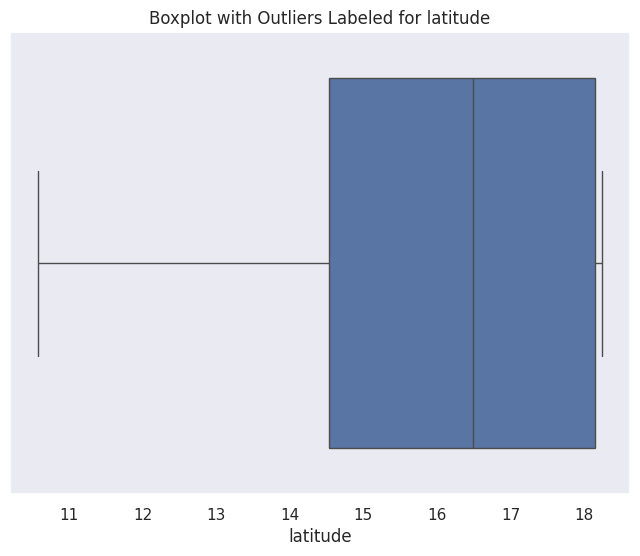

Number of outliers: 0


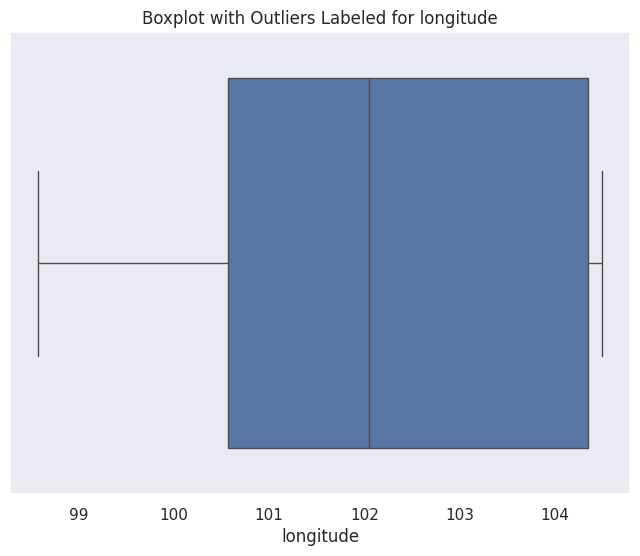

Number of outliers: 4


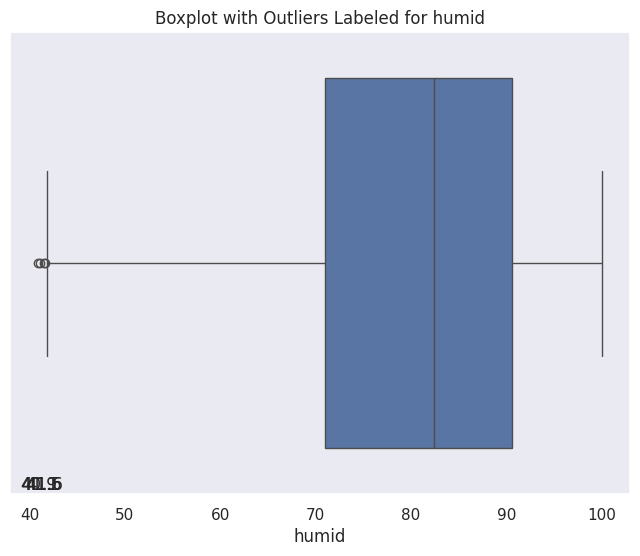

Number of outliers: 0


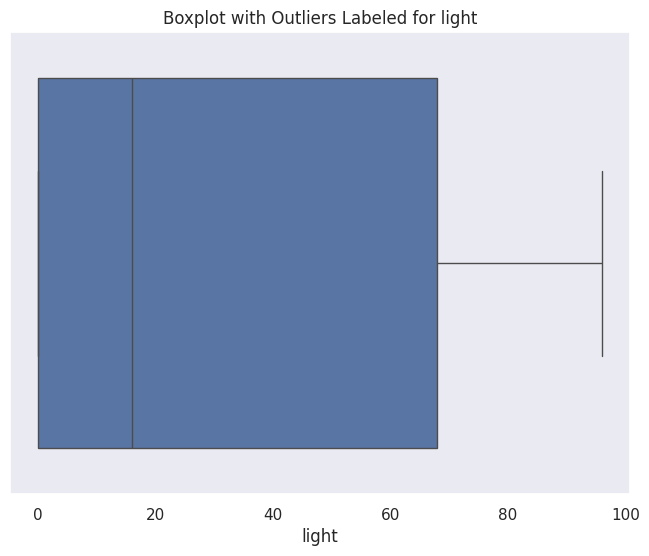

Number of outliers: 841


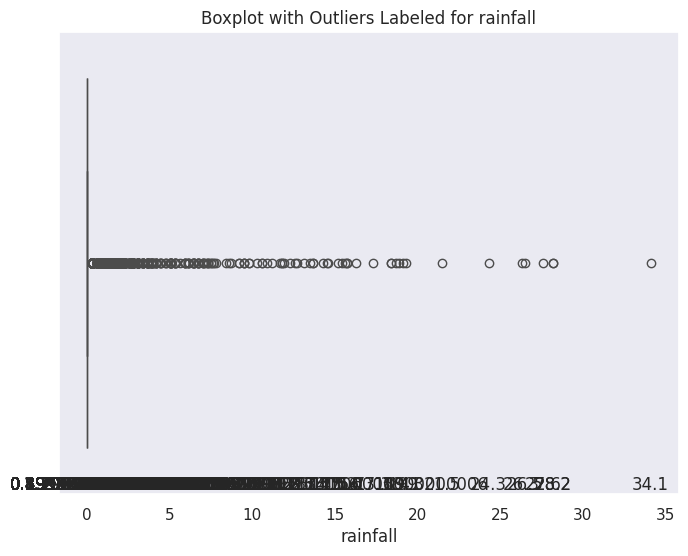

Number of outliers: 0


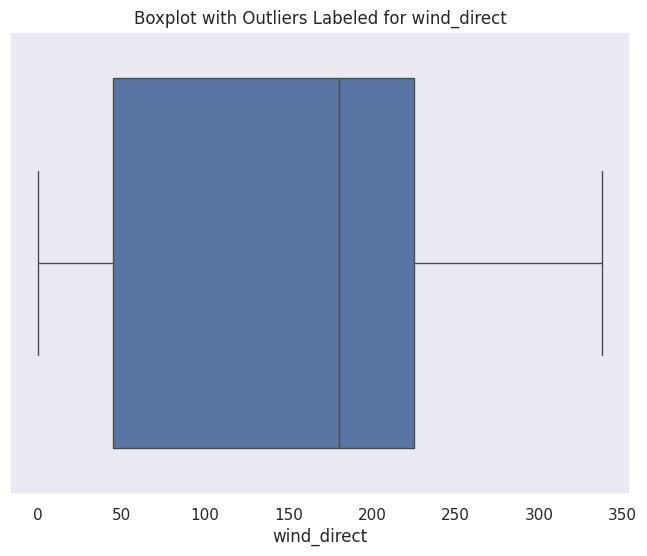

Number of outliers: 644


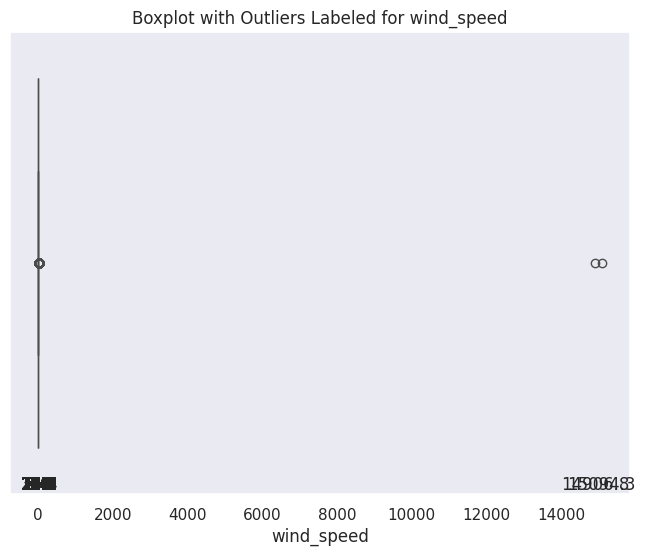

Number of outliers: 166


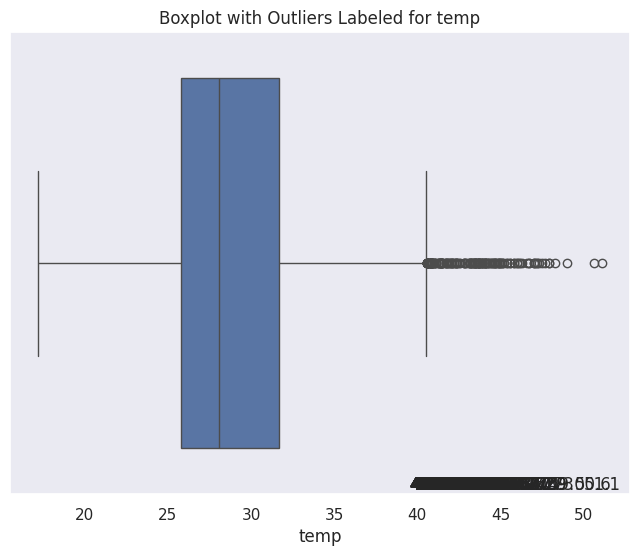

In [ ]:
#find outliers
columns_to_check = ['latitude', 'longitude', 'humid','light', 'rainfall','wind_direct', 'wind_speed', 'temp']  # Replace with your actual columns

# Loop through the selected columns
for col in columns_to_check:
    # Calculate IQR
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
   #print(f"\nOutliers in column '{col}':\n", outliers[col])
    print(f"Number of outliers: {len(outliers)}")

    # Create boxplot for this column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_df[col])

    # Add labels to the outliers
    for x in outliers[col]:
        plt.text(x, 0.5, x, ha='center', va='bottom')

    plt.title(f'Boxplot with Outliers Labeled for {col}')
    plt.xlabel(col)
    plt.show()

    # # Handle outliers (e.g., impute, remove)
    # # Example: Impute with median
    # median = train_df[col].median()
    # train_df.loc[(train_df[col] < lower_bound) | (train_df[col] > upper_bound), col] = median


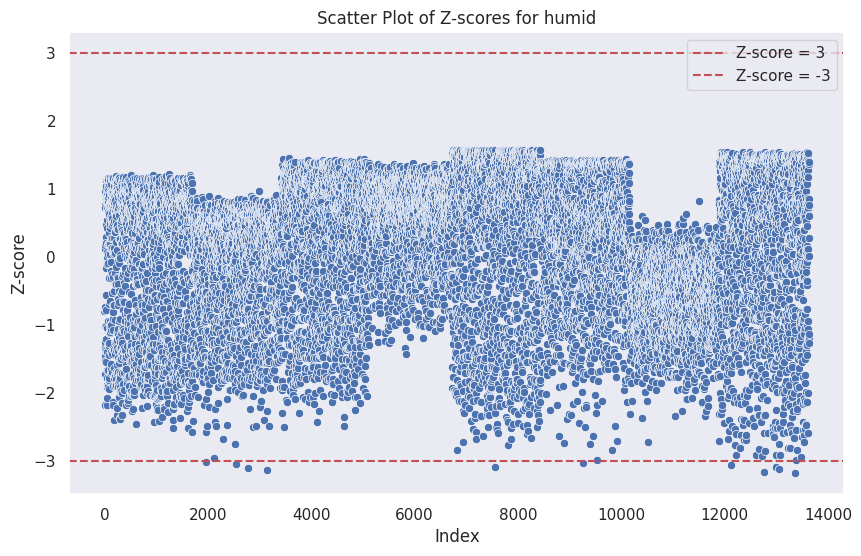

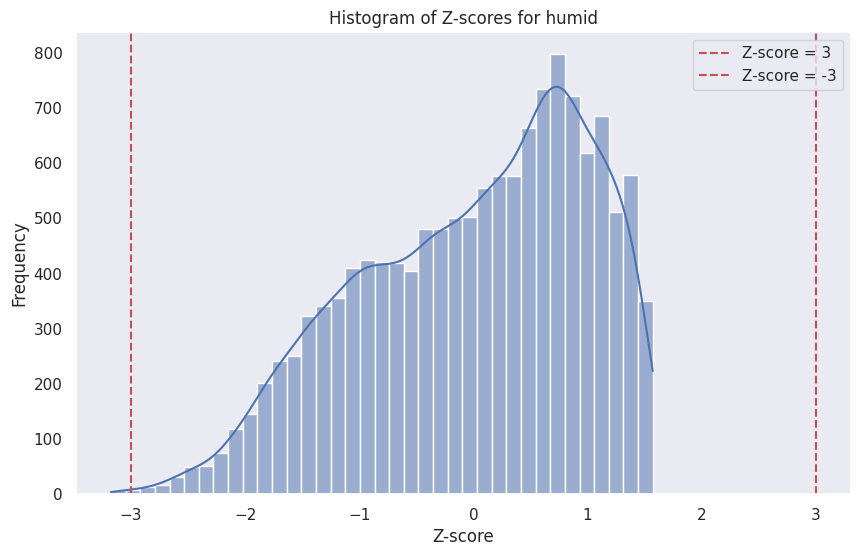

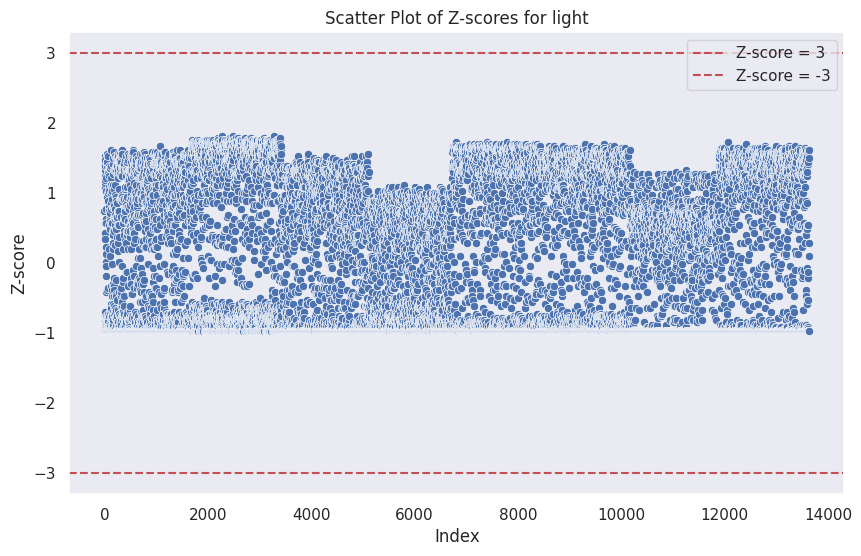

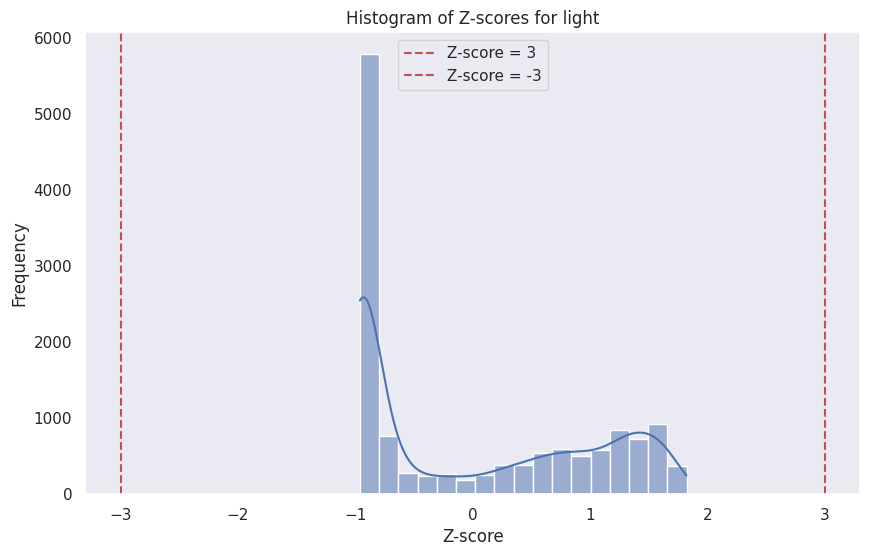

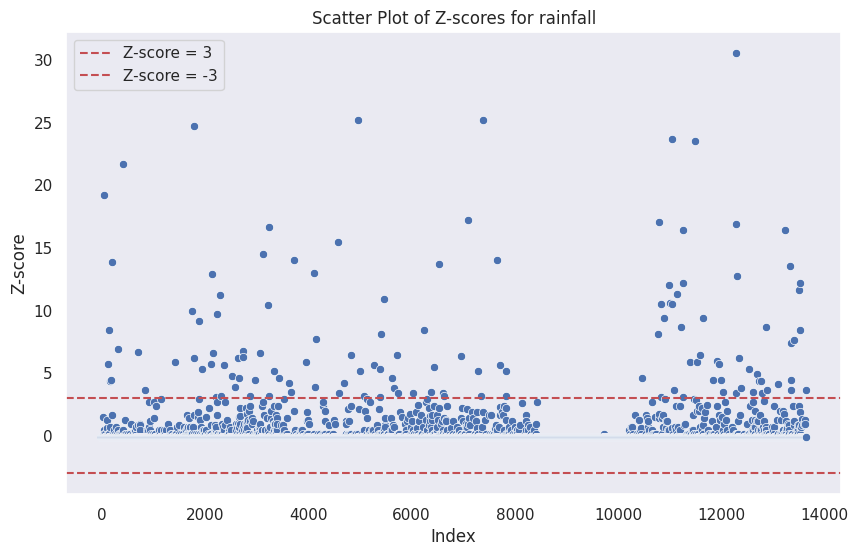

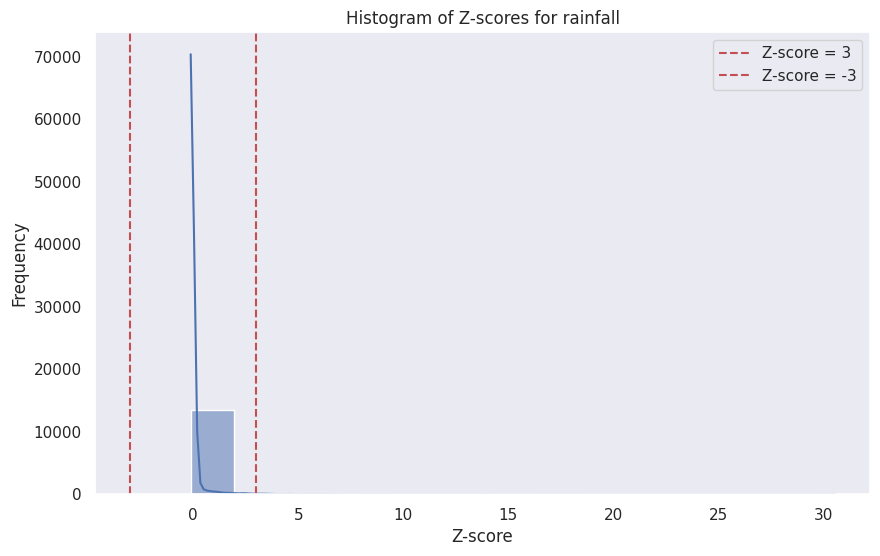

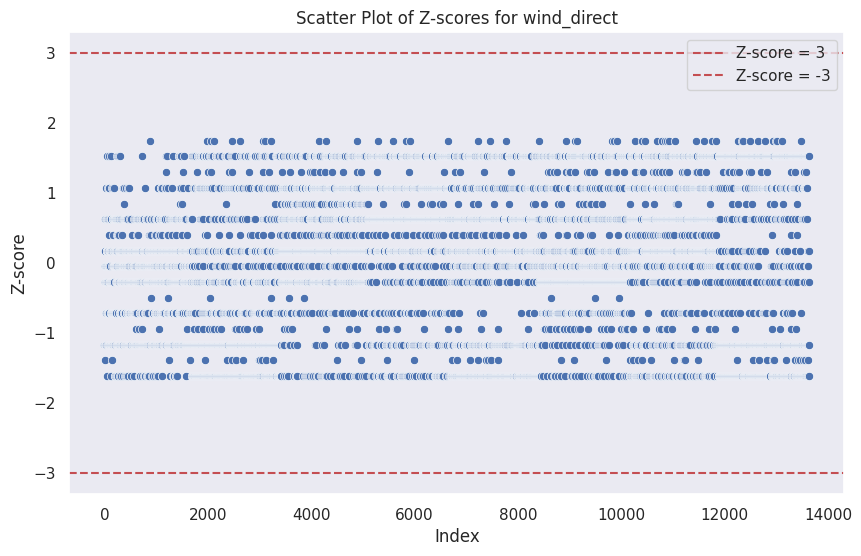

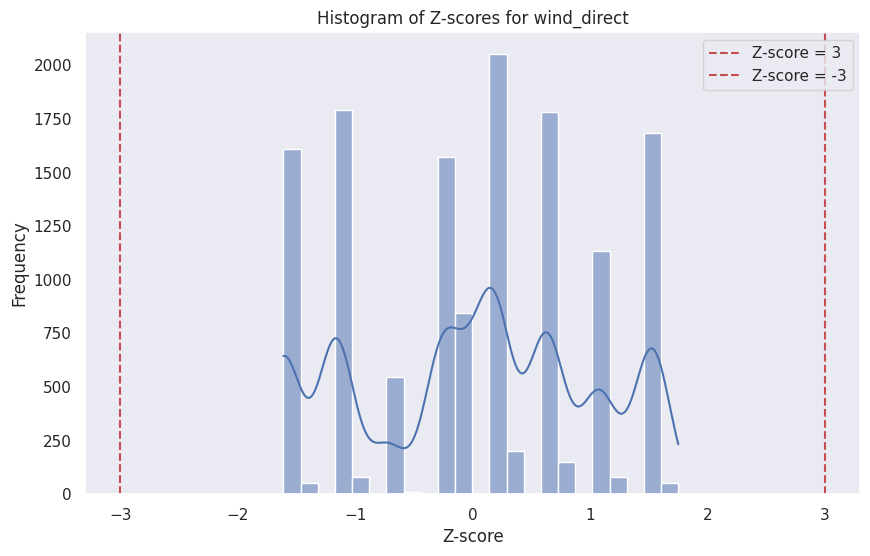

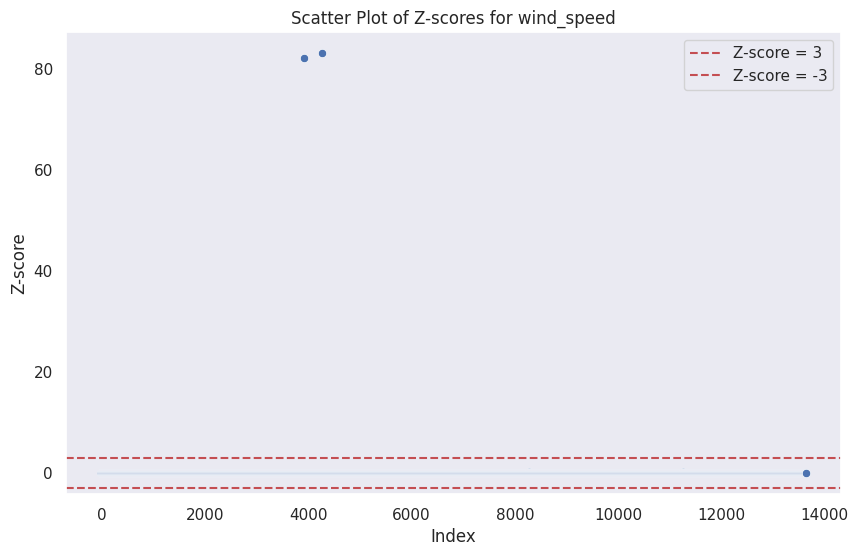

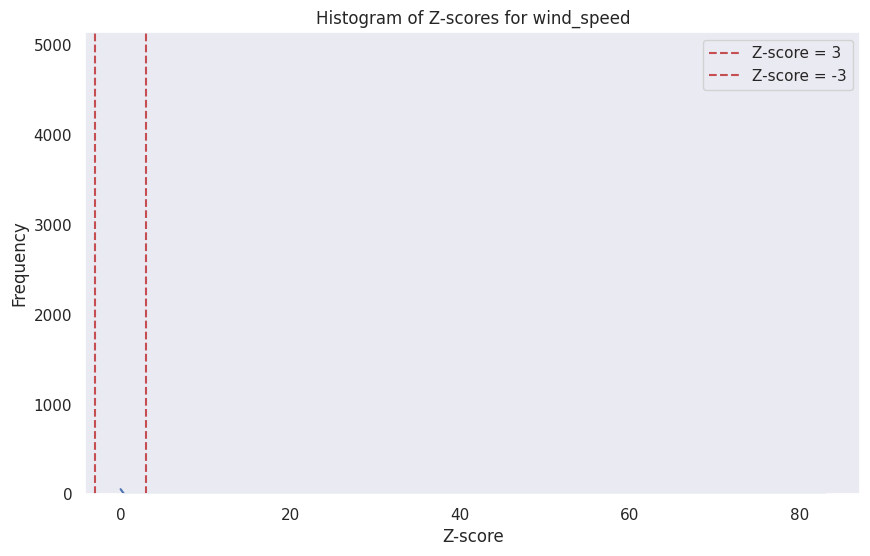

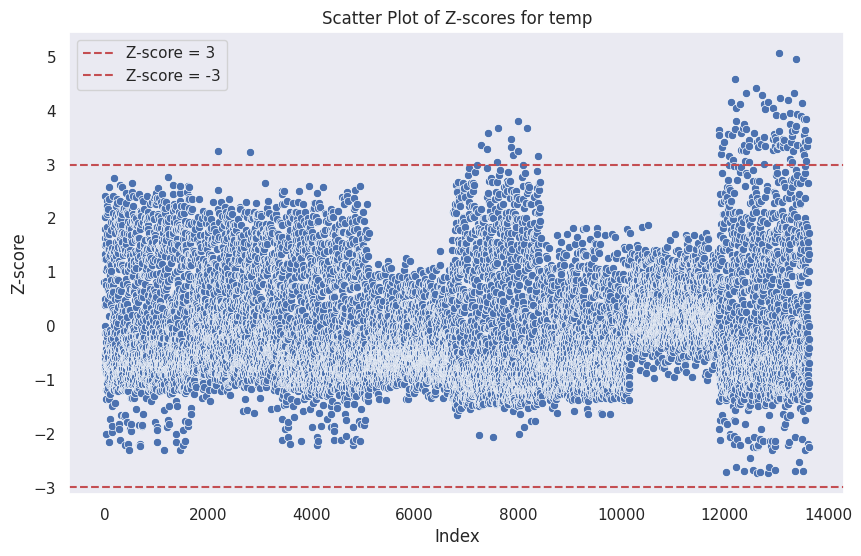

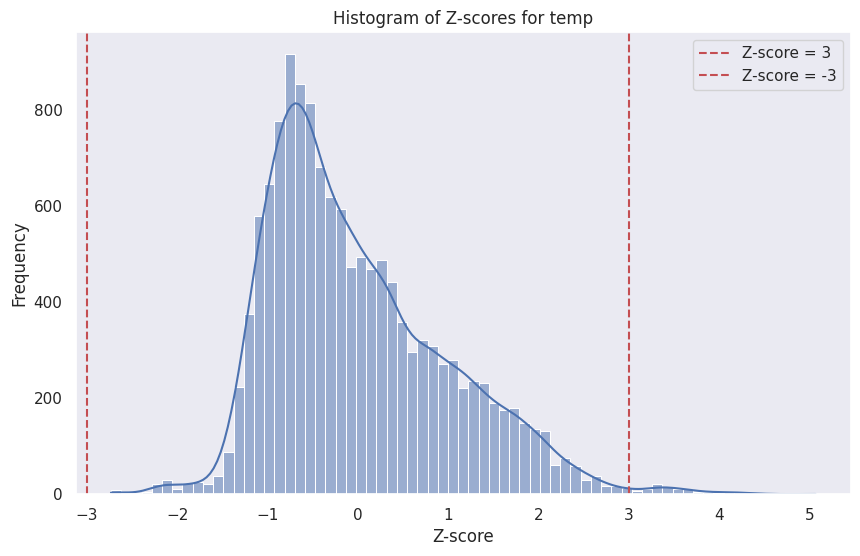

In [ ]:
#columns_to_check = [col for col in train_df.columns if col not in ['latitude', 'longitude']]

for col in [x for x in columns_to_check if x not in ['latitude', 'longitude']]:
  # ... (calculate Z-scores for each column you want to analyze) ...
  z_scores = (train_df[col] - train_df[col].mean()) / train_df[col].std()

  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=train_df.index, y=z_scores)
  plt.axhline(y=3, color='r', linestyle='dashed', label='Z-score = 3')
  plt.axhline(y=-3, color='r', linestyle='dashed', label='Z-score = -3')
  plt.title(f'Scatter Plot of Z-scores for {col}')
  plt.xlabel('Index')
  plt.ylabel('Z-score')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.histplot(z_scores, kde=True)
  plt.axvline(x=3, color='r', linestyle='dashed', label='Z-score = 3')
  plt.axvline(x=-3, color='r', linestyle='dashed', label='Z-score = -3')
  plt.title(f'Histogram of Z-scores for {col}')
  plt.xlabel('Z-score')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()


In [ ]:
# Feature Engineering on 'time' column in df_train
train_df['year'] = train_df['time'].dt.year
train_df['month'] = train_df['time'].dt.month
train_df['day'] = train_df['time'].dt.day
train_df['hour'] = train_df['time'].dt.hour
train_df['minute'] = train_df['time'].dt.minute
train_df['second'] = train_df['time'].dt.second
train_df
# # Calculate 'time_since_reference'
# reference_timestamp = pd.Timestamp('2022-01-01', tz='UTC+07:00')
# X_train['time_since_reference'] = (X_train['time'] - reference_timestamp).dt.total_seconds()

#train_df.drop('time', axis=1, inplace=True)  # Drop the original 'time' column


,station_id,tambon_code,amphur_code,province_code,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed,temp,year,month,day,hour,minute,second
0,1111,300903,3009,30,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,0.0,45.0,4.3,32.6,2022,7,20,15,0,0
1,1111,300903,3009,30,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,0.0,45.0,1.9,37.9,2022,5,16,9,0,0
2,1111,300903,3009,30,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,0.0,135.0,3.2,26.4,2022,6,26,19,0,0
3,1111,300903,3009,30,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,0.0,157.5,0.0,25.6,2022,7,16,4,0,0
4,1111,300903,3009,30,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,0.0,180.0,2.3,36.2,2022,5,30,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,8888,490706,4907,49,16.494229,104.350891,2022-06-14 01:00:00+07:00,97.9,0.0,4.2,0.0,0.0,23.5,2022,6,14,1,0,0
13631,8888,490706,4907,49,16.494229,104.350891,2022-05-03 02:00:00+07:00,80.6,0.0,0.0,135.0,2.9,19.3,2022,5,3,2,0,0
13632,8888,490706,4907,49,16.494229,104.350891,2022-05-19 06:00:00+07:00,87.9,37.0,0.0,45.0,3.0,24.5,2022,5,19,6,0,0
13633,8888,490706,4907,49,16.494229,104.350891,2022-06-15 02:00:00+07:00,89.9,0.0,0.0,315.0,0.0,27.3,2022,6,15,2,0,0


In [ ]:
train_df.drop('time', axis=1, inplace=True)  # Drop the original 'time' column

In [ ]:
train_df.head()

,station_id,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,temp,year,month,day,hour,minute,second
0,1111,300903,3009,30,15.112831,102.052114,70.6,59.0,0.0,45.0,4.3,32.6,2022,7,20,15,0,0
1,1111,300903,3009,30,15.112831,102.052114,62.3,76.0,0.0,45.0,1.9,37.9,2022,5,16,9,0,0
2,1111,300903,3009,30,15.112831,102.052114,90.3,0.0,0.0,135.0,3.2,26.4,2022,6,26,19,0,0
3,1111,300903,3009,30,15.112831,102.052114,91.7,0.0,0.0,157.5,0.0,25.6,2022,7,16,4,0,0
4,1111,300903,3009,30,15.112831,102.052114,59.1,71.0,0.0,180.0,2.3,36.2,2022,5,30,8,0,0


In [ ]:
#humid:4, rainfall :841, wind speed 644, temp 166


In [ ]:
# # using Winsorization with the 'winsorize' function from scipy
# from scipy.stats.mstats import winsorize

# for col in ['humid', 'rainfall', 'wind_speed', 'temp']:
#     train_df[col] = winsorize(train_df[col], limits=[0.10, 0.10])  # Cap both tails at 5%
# train_df.head()

In [ ]:
#Sorted descending to pick the values of humid for them to drop it
train_df.sort_values(by = 'humid', ascending = True)[:20]

# train_df = train_df.drop(train_df[train_df['GrLivArea'] == 5642].index)
# train_df= train_df.drop(df_train[df_train['GrLivArea'] == 4676].index)

,station_id,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,temp,year,month,day,hour,minute,second
13363,8888,490706,4907,49,16.494229,104.350891,40.9,86.0,0.0,45.0,1.0,44.9,2022,5,5,15,0,0
12760,8888,490706,4907,49,16.494229,104.350891,41.1,87.0,0.0,45.0,2.7,44.3,2022,5,5,16,0,0
3139,2222,380704,3807,38,18.142499,103.806521,41.5,94.0,0.0,180.0,5.3,36.9,2022,5,5,13,0,0
13049,8888,490706,4907,49,16.494229,104.350891,41.6,85.0,0.0,270.0,0.0,51.1,2022,7,27,16,0,0
2777,2222,380704,3807,38,18.142499,103.806521,41.8,92.0,0.0,270.0,1.2,36.5,2022,5,5,15,0,0
7554,5555,550404,5504,55,18.241106,100.690577,42.1,89.0,0.0,315.0,3.4,39.3,2022,5,4,14,0,0
12993,8888,490706,4907,49,16.494229,104.350891,42.1,75.0,0.0,0.0,0.8,44.1,2022,5,5,17,0,0
12118,8888,490706,4907,49,16.494229,104.350891,42.4,75.0,0.0,0.0,0.6,47.2,2022,6,21,17,0,0
2553,2222,380704,3807,38,18.142499,103.806521,42.6,93.0,0.0,225.0,6.3,36.8,2022,5,5,14,0,0
9266,6666,630601,6306,63,16.712990,98.573417,42.8,86.0,0.0,180.0,2.5,36.9,2022,5,4,12,0,0


## outliers analysis

In [ ]:
# Assuming 'df' is your DataFrame and 'column_name' is the column you're interested in
min_value = train_df['temp'].min()
max_value = train_df['temp'].max()

print(f"Range of values in column '{'temp'}': ({min_value}, {max_value})")

Range of values in column 'temp': (17.2, 51.1)


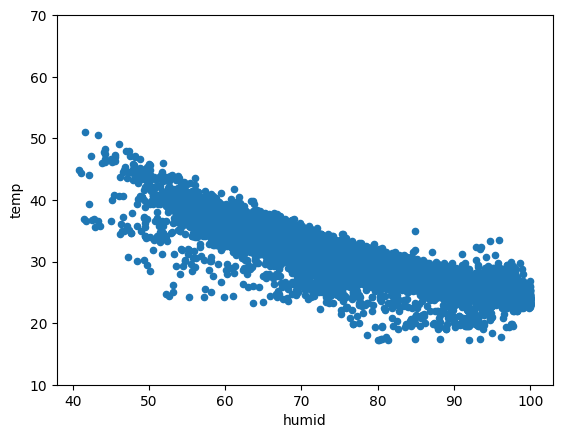

In [ ]:
#Scatterplot of humid and Temp
var = 'humid'
data = pd.concat([train_df['temp'], train_df[var]], axis=1)
# set ylimit to limit our data
data.plot.scatter(x=var, y='temp', ylim=(10,70));

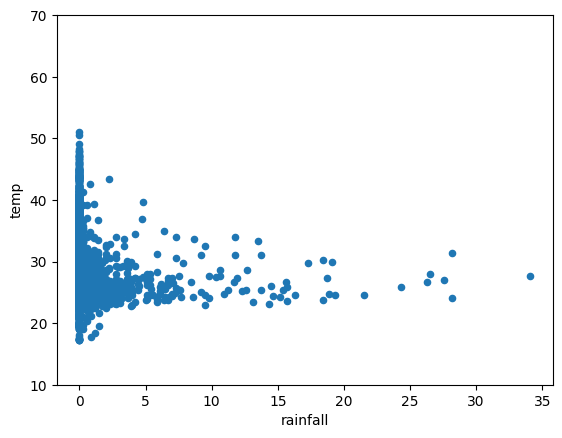

In [ ]:
#Scatterplot of humid and Temp
var = 'rainfall'
data = pd.concat([train_df['temp'], train_df[var]], axis=1)
# set ylimit to limit our data
data.plot.scatter(x=var, y='temp', ylim=(10,70));

In [ ]:
train_df.sort_values(by = 'rainfall', ascending = False)[:20]

,station_id,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,temp,year,month,day,hour,minute,second
12275,8888,490706,4907,49,16.494229,104.350891,91.4,0.0,34.1,315.0,0.0,27.6,2022,6,14,0,0,0
7391,5555,550404,5504,55,18.241106,100.690577,73.7,56.0,28.2,45.0,1.4,31.4,2022,5,9,13,0,0
4975,3333,330802,3308,33,14.533026,104.495172,96.7,30.0,28.2,202.5,2.9,24.1,2022,7,31,13,0,0
1789,2222,380704,3807,38,18.142499,103.806521,83.5,3.0,27.6,270.0,4.0,27.0,2022,7,31,1,0,0
11044,7777,102601,1026,10,13.777972,100.569662,83.6,5.0,26.5,270.0,4.0,27.9,2022,5,16,16,0,0
11496,7777,102601,1026,10,13.777972,100.569662,90.7,0.0,26.3,225.0,26.6,26.7,2022,7,1,19,0,0
427,1111,300903,3009,30,15.112831,102.052114,92.3,0.0,24.3,180.0,11.3,25.9,2022,7,20,18,0,0
55,1111,300903,3009,30,15.112831,102.052114,92.2,0.0,21.5,0.0,6.3,24.5,2022,7,31,21,0,0
7091,5555,550404,5504,55,18.241106,100.690577,98.5,23.0,19.3,225.0,8.2,24.6,2022,7,24,17,0,0
10784,7777,102601,1026,10,13.777972,100.569662,81.0,0.0,19.1,225.0,16.0,30.0,2022,7,20,19,0,0


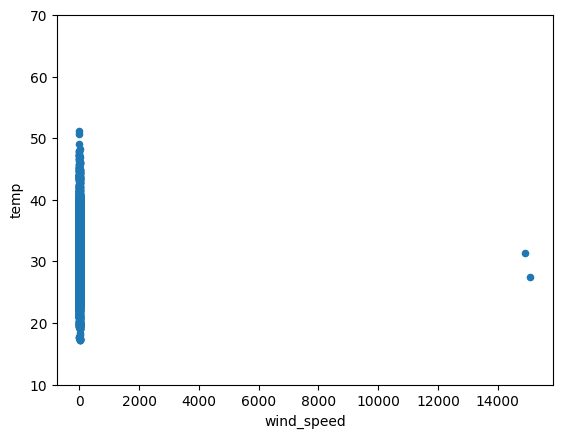

In [ ]:
#Scatterplot of humid and Temp
var = 'wind_speed'
data = pd.concat([train_df['temp'], train_df[var]], axis=1)
# set ylimit to limit our data
data.plot.scatter(x=var, y='temp', ylim=(10,70));

In [ ]:
train_df.sort_values(by = 'wind_speed', ascending = False)[:5]

,station_id,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,temp,year,month,day,hour,minute,second
4274,3333,330802,3308,33,14.533026,104.495172,82.1,0.0,0.0,202.5,15094.3,27.5,2022,7,2,0,0,0
3931,3333,330802,3308,33,14.533026,104.495172,71.9,46.0,0.0,0.0,14906.8,31.4,2022,5,5,15,0,0
11259,7777,102601,1026,10,13.777972,100.569662,79.5,2.0,18.4,180.0,31.2,30.3,2022,5,17,16,0,0
8269,5555,550404,5504,55,18.241106,100.690577,61.5,90.0,0.0,225.0,27.1,34.6,2022,6,14,11,0,0
11496,7777,102601,1026,10,13.777972,100.569662,90.7,0.0,26.3,225.0,26.6,26.7,2022,7,1,19,0,0


In [ ]:

train_df = train_df.drop(train_df[train_df['wind_speed'] == 15094.3].index)
train_df = train_df.drop(train_df[train_df['wind_speed'] == 14906.8].index)

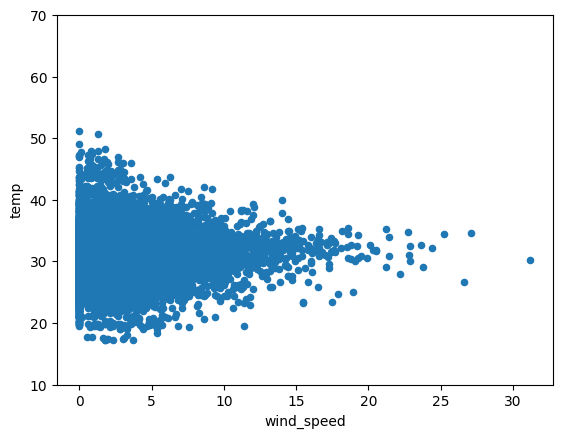

In [ ]:
#Scatterplot of humid and Temp
var = 'wind_speed'
data = pd.concat([train_df['temp'], train_df[var]], axis=1)
# set ylimit to limit our data
data.plot.scatter(x=var, y='temp', ylim=(10,70));

/tmp/ipykernel_35191/152518234.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['temp'],bins = 20);


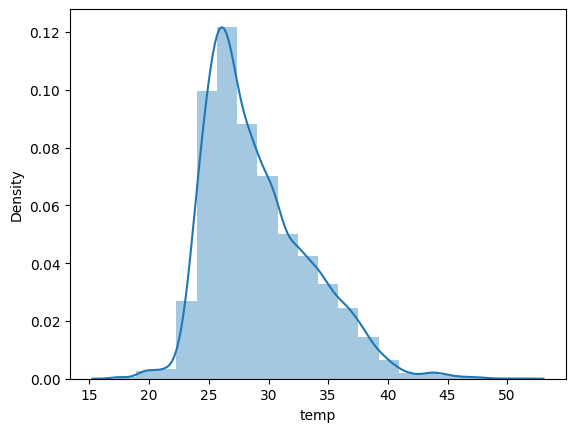

In [ ]:
#target variable temp
# Using Seaborn to create a distplot with 20 bins
sns.distplot(train_df['temp'],bins = 20);

<ipython-input-341-c9e75ae76a6b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['temp'] , fit=norm);



 mu = 29.08 and sigma = 4.34



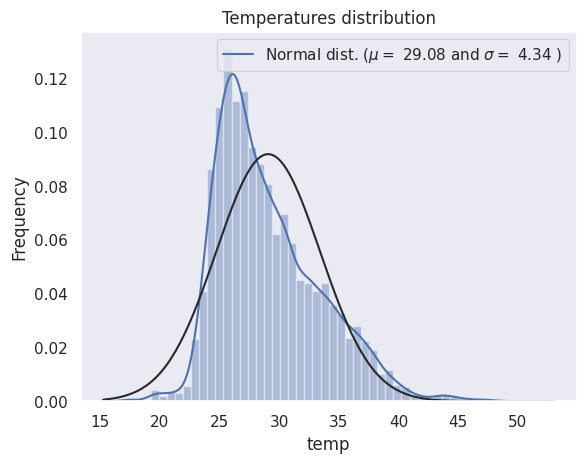

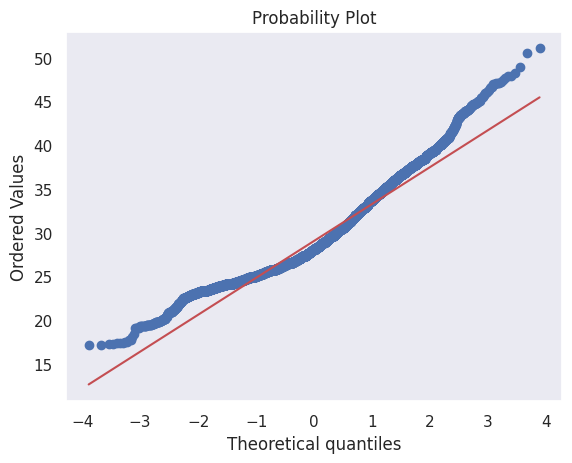

In [ ]:

from scipy.stats import norm,skew
from scipy import stats

#Use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#train_df["temp"] = np.log1p(train_df["temp"])

#Check the new distribution
sns.distplot(train_df['temp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['temp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Temperatures distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['temp'], plot=plt)
plt.show()

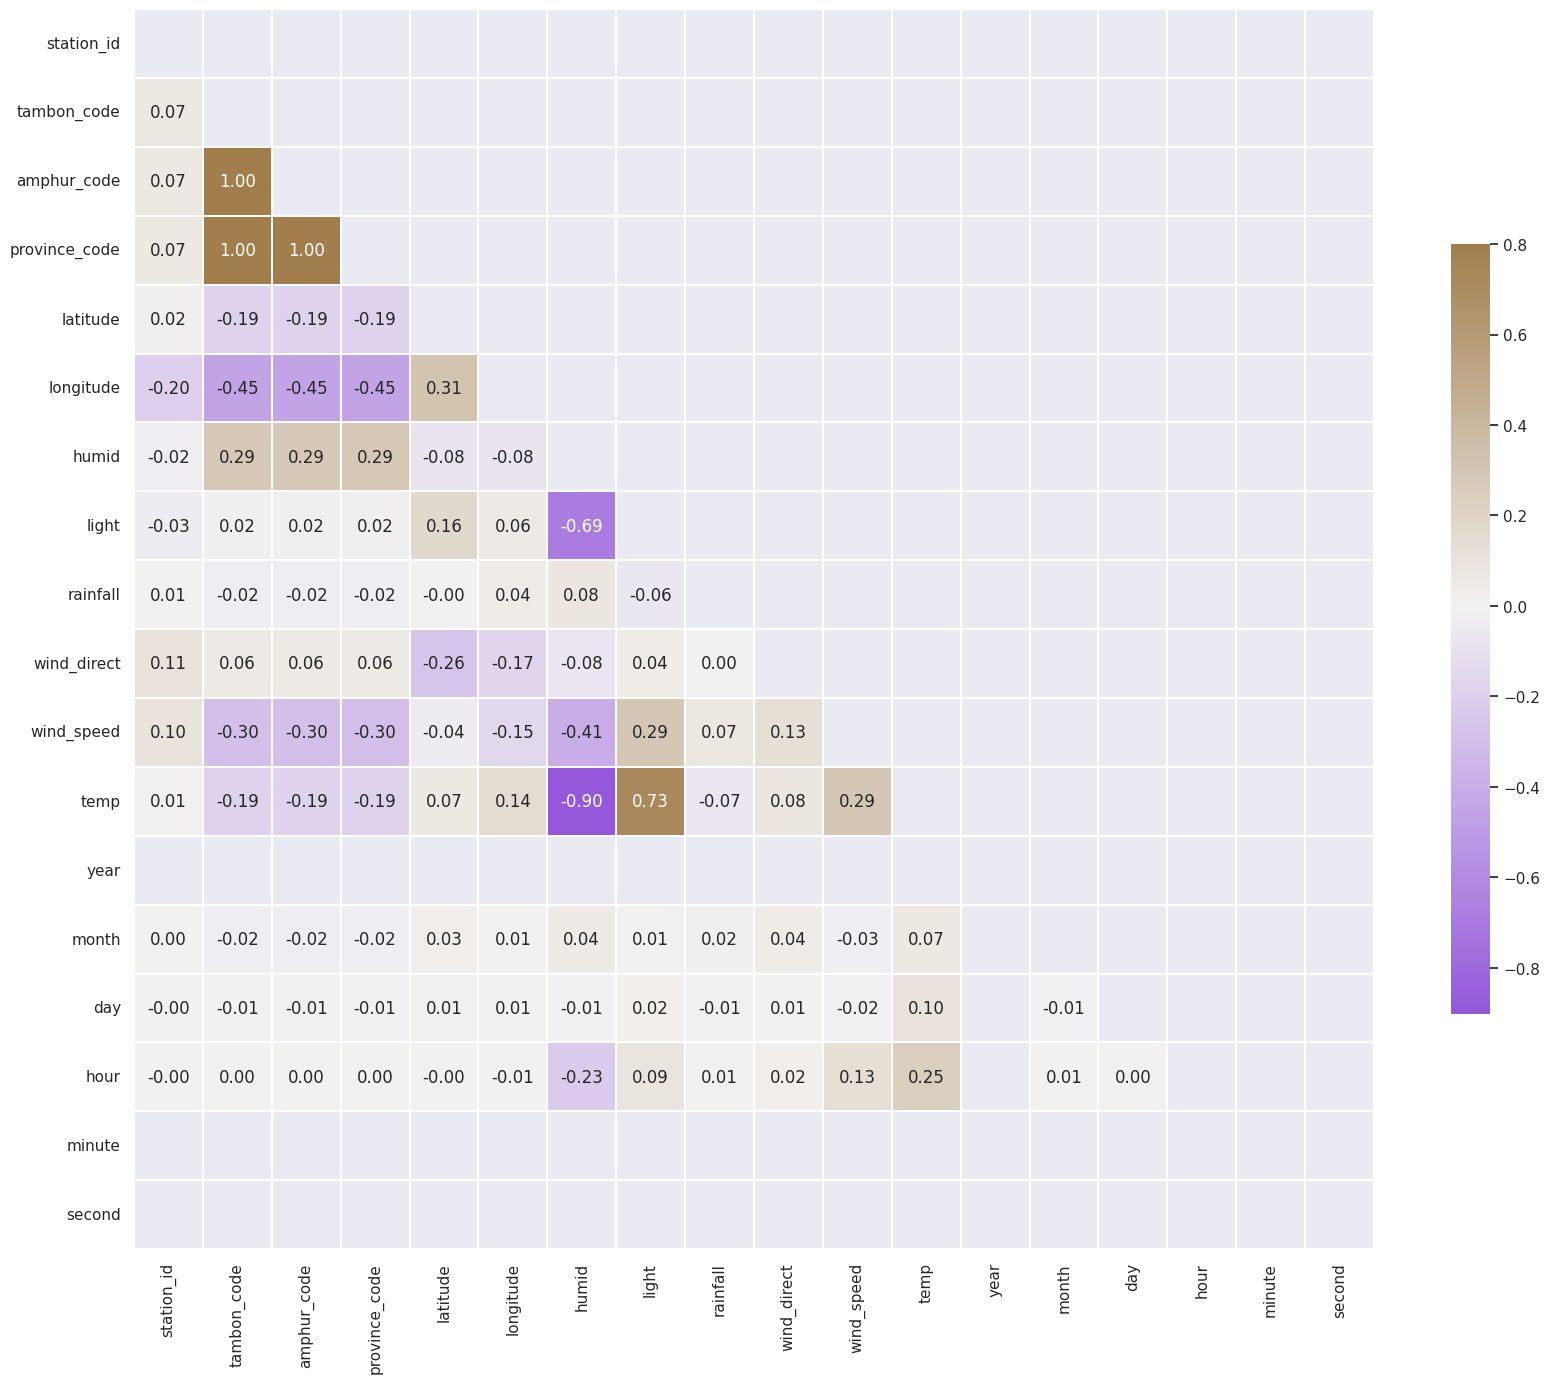

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="dark")
corr = train_df.corr()
mask = np.zeros_like(corr, dtype=bool)  # Use bool instead of np.bool
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(1000, 50, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, vmax=.8, cmap=cmap, center=0, fmt='.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5});

plt.show()


In [ ]:
train_df.drop(columns = ['station_id', 'year','minute','second'], axis = 1, inplace = True)
train_df.head()

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,temp,month,day,hour
0,300903,3009,30,15.112831,102.052114,70.6,59.0,0.0,45.0,4.3,32.6,7,20,15
1,300903,3009,30,15.112831,102.052114,62.3,76.0,0.0,45.0,1.9,37.9,5,16,9
2,300903,3009,30,15.112831,102.052114,90.3,0.0,0.0,135.0,3.2,26.4,6,26,19
3,300903,3009,30,15.112831,102.052114,91.7,0.0,0.0,157.5,0.0,25.6,7,16,4
4,300903,3009,30,15.112831,102.052114,59.1,71.0,0.0,180.0,2.3,36.2,5,30,8


In [ ]:
train_df.isnull().sum()

tambon_code      0
amphur_code      0
province_code    0
latitude         0
longitude        0
humid            0
light            0
rainfall         0
wind_direct      0
wind_speed       0
temp             0
month            0
day              0
hour             0
dtype: int64

## Test

In [ ]:
!pwd

/project/lt900223-ai24xw/scripts


In [ ]:
df_test = pd.read_csv("/project/lt900223-ai24xw/scripts/finalhack/datasets/iot/IOT_Test.csv")
df_test

,id,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed
0,1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-23 04:00:00+07:00,88.9,1.0,NaN,NaN,0.0,180.0,2.3
1,2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-12 16:00:00+07:00,85.0,40.0,NaN,NaN,0.3,135.0,1.5
2,3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-20 03:00:00+07:00,88.9,7.0,NaN,NaN,0.0,157.5,0.0
3,4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-13 13:00:00+07:00,81.9,66.0,NaN,NaN,0.0,135.0,0.2
4,5,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-05 09:00:00+07:00,64.9,71.0,NaN,NaN,0.0,225.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,3409,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-05 03:00:00+07:00,87.0,0.0,NaN,NaN,0.0,315.0,0.0
3409,3410,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-26 09:00:00+07:00,71.7,81.0,NaN,NaN,0.0,180.0,3.1
3410,3411,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-21 22:00:00+07:00,86.5,2.0,NaN,NaN,0.0,0.0,0.6
3411,3412,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-07-21 01:00:00+07:00,96.5,0.0,NaN,NaN,0.0,0.0,0.0


In [ ]:
len(df_test)

3413

In [ ]:
station_id_map = {'บ้านนา_2':1111, 'บ้านนาสะแบง_2':2222 ,'บ้านสำโรงเกียรติ_2':3333 ,'โรงเรียนท่าข้ามวิทยา':4444,
                  'โรงเรียนบ้านนา' :5555,'โรงเรียนสรรพวิทยาคม':6666,'โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล)':7777, 'โรงเรียนหนองสูงสามัคคีวิทยา_2':8888}

df_test['station_name'] = df_test['station_name'].map(station_id_map)
df_test = df_test.rename(columns={'station_name':'station_id'})
df_test

,id,mac,station_id,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed
0,1,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-23 04:00:00+07:00,88.9,1.0,NaN,NaN,0.0,180.0,2.3
1,2,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-12 16:00:00+07:00,85.0,40.0,NaN,NaN,0.3,135.0,1.5
2,3,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-20 03:00:00+07:00,88.9,7.0,NaN,NaN,0.0,157.5,0.0
3,4,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-13 13:00:00+07:00,81.9,66.0,NaN,NaN,0.0,135.0,0.2
4,5,3C71BF18EA64,1111,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-05 09:00:00+07:00,64.9,71.0,NaN,NaN,0.0,225.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,3409,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-05 03:00:00+07:00,87.0,0.0,NaN,NaN,0.0,315.0,0.0
3409,3410,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-26 09:00:00+07:00,71.7,81.0,NaN,NaN,0.0,180.0,3.1
3410,3411,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-21 22:00:00+07:00,86.5,2.0,NaN,NaN,0.0,0.0,0.6
3411,3412,3C71BF18CEA4,8888,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-07-21 01:00:00+07:00,96.5,0.0,NaN,NaN,0.0,0.0,0.0


In [ ]:
df_test = df_test.drop(columns=['mac', 'amphur_namt','pm10','pm2.5','province_namt', 'tambon_namt'])
df_test.head()

,id,station_id,tambon_code,amphur_code,province_code,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed
0,1,1111,300903,3009,30,15.112831,102.052114,2022-05-23 04:00:00+07:00,88.9,1.0,0.0,180.0,2.3
1,2,1111,300903,3009,30,15.112831,102.052114,2022-05-12 16:00:00+07:00,85.0,40.0,0.3,135.0,1.5
2,3,1111,300903,3009,30,15.112831,102.052114,2022-06-20 03:00:00+07:00,88.9,7.0,0.0,157.5,0.0
3,4,1111,300903,3009,30,15.112831,102.052114,2022-07-13 13:00:00+07:00,81.9,66.0,0.0,135.0,0.2
4,5,1111,300903,3009,30,15.112831,102.052114,2022-07-05 09:00:00+07:00,64.9,71.0,0.0,225.0,2.4


In [ ]:
df_test = df_test.drop(columns=['id'], axis=1)
df_test.head()

,station_id,tambon_code,amphur_code,province_code,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed
0,1111,300903,3009,30,15.112831,102.052114,2022-05-23 04:00:00+07:00,88.9,1.0,0.0,180.0,2.3
1,1111,300903,3009,30,15.112831,102.052114,2022-05-12 16:00:00+07:00,85.0,40.0,0.3,135.0,1.5
2,1111,300903,3009,30,15.112831,102.052114,2022-06-20 03:00:00+07:00,88.9,7.0,0.0,157.5,0.0
3,1111,300903,3009,30,15.112831,102.052114,2022-07-13 13:00:00+07:00,81.9,66.0,0.0,135.0,0.2
4,1111,300903,3009,30,15.112831,102.052114,2022-07-05 09:00:00+07:00,64.9,71.0,0.0,225.0,2.4


In [ ]:
df_test["time"] = pd.to_datetime(df_test["time"])

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype                    
---  ------         --------------  -----                    
 0   station_id     3413 non-null   int64                    
 1   tambon_code    3413 non-null   int64                    
 2   amphur_code    3413 non-null   int64                    
 3   province_code  3413 non-null   int64                    
 4   latitude       3413 non-null   float64                  
 5   longitude      3413 non-null   float64                  
 6   time           3413 non-null   datetime64[ns, UTC+07:00]
 7   humid          3413 non-null   float64                  
 8   light          3413 non-null   float64                  
 9   rainfall       3413 non-null   float64                  
 10  wind_direct    3413 non-null   float64                  
 11  wind_speed     3413 non-null   float64                  
dtypes: datetime64[ns, UT

In [ ]:
# df_test = df_test.sort_values(by=['humid'])
# df_test['humid']

In [ ]:
df_test.isnull().sum()

station_id       0
tambon_code      0
amphur_code      0
province_code    0
latitude         0
longitude        0
time             0
humid            0
light            0
rainfall         0
wind_direct      0
wind_speed       0
dtype: int64

In [ ]:
# Feature Engineering on 'time' column in df_train
df_test['year'] = df_test['time'].dt.year
df_test['month'] = df_test['time'].dt.month
df_test['day'] = df_test['time'].dt.day
df_test['hour'] = df_test['time'].dt.hour
df_test['minute'] = df_test['time'].dt.minute
df_test['second'] = df_test['time'].dt.second
df_test
# # Calculate 'time_since_reference'
# reference_timestamp = pd.Timestamp('2022-01-01', tz='UTC+07:00')
# X_train['time_since_reference'] = (X_train['time'] - reference_timestamp).dt.total_seconds()

#train_df.drop('time', axis=1, inplace=True)  # Drop the original 'time' column


,station_id,tambon_code,amphur_code,province_code,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed,year,month,day,hour,minute,second
0,1111,300903,3009,30,15.112831,102.052114,2022-05-23 04:00:00+07:00,88.9,1.0,0.0,180.0,2.3,2022,5,23,4,0,0
1,1111,300903,3009,30,15.112831,102.052114,2022-05-12 16:00:00+07:00,85.0,40.0,0.3,135.0,1.5,2022,5,12,16,0,0
2,1111,300903,3009,30,15.112831,102.052114,2022-06-20 03:00:00+07:00,88.9,7.0,0.0,157.5,0.0,2022,6,20,3,0,0
3,1111,300903,3009,30,15.112831,102.052114,2022-07-13 13:00:00+07:00,81.9,66.0,0.0,135.0,0.2,2022,7,13,13,0,0
4,1111,300903,3009,30,15.112831,102.052114,2022-07-05 09:00:00+07:00,64.9,71.0,0.0,225.0,2.4,2022,7,5,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,8888,490706,4907,49,16.494229,104.350891,2022-06-05 03:00:00+07:00,87.0,0.0,0.0,315.0,0.0,2022,6,5,3,0,0
3409,8888,490706,4907,49,16.494229,104.350891,2022-05-26 09:00:00+07:00,71.7,81.0,0.0,180.0,3.1,2022,5,26,9,0,0
3410,8888,490706,4907,49,16.494229,104.350891,2022-05-21 22:00:00+07:00,86.5,2.0,0.0,0.0,0.6,2022,5,21,22,0,0
3411,8888,490706,4907,49,16.494229,104.350891,2022-07-21 01:00:00+07:00,96.5,0.0,0.0,0.0,0.0,2022,7,21,1,0,0


In [ ]:
df_test.drop('time', axis=1, inplace=True)  # Drop the original 'time' column
df_test.head()

,station_id,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,year,month,day,hour,minute,second
0,1111,300903,3009,30,15.112831,102.052114,88.9,1.0,0.0,180.0,2.3,2022,5,23,4,0,0
1,1111,300903,3009,30,15.112831,102.052114,85.0,40.0,0.3,135.0,1.5,2022,5,12,16,0,0
2,1111,300903,3009,30,15.112831,102.052114,88.9,7.0,0.0,157.5,0.0,2022,6,20,3,0,0
3,1111,300903,3009,30,15.112831,102.052114,81.9,66.0,0.0,135.0,0.2,2022,7,13,13,0,0
4,1111,300903,3009,30,15.112831,102.052114,64.9,71.0,0.0,225.0,2.4,2022,7,5,9,0,0


In [ ]:
df_test.isnull().sum()

station_id       0
tambon_code      0
amphur_code      0
province_code    0
latitude         0
longitude        0
humid            0
light            0
rainfall         0
wind_direct      0
wind_speed       0
year             0
month            0
day              0
hour             0
minute           0
second           0
dtype: int64

In [ ]:
# # Example using Winsorization with the 'winsorize' function from scipy
# from scipy.stats.mstats import winsorize

# # Assuming 'train_df' is your DataFrame
# for col in ['humid', 'rainfall', 'wind_speed']:
#     df_test[col] = winsorize(df_test[col], limits=[0.10, 0.10])  # Cap both tails at 5%
# df_test

In [ ]:
df_test.drop(columns = ['station_id', 'year','minute','second'], axis = 1, inplace = True)
df_test.head()

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,month,day,hour
0,300903,3009,30,15.112831,102.052114,88.9,1.0,0.0,180.0,2.3,5,23,4
1,300903,3009,30,15.112831,102.052114,85.0,40.0,0.3,135.0,1.5,5,12,16
2,300903,3009,30,15.112831,102.052114,88.9,7.0,0.0,157.5,0.0,6,20,3
3,300903,3009,30,15.112831,102.052114,81.9,66.0,0.0,135.0,0.2,7,13,13
4,300903,3009,30,15.112831,102.052114,64.9,71.0,0.0,225.0,2.4,7,5,9



Outliers in column 'rainfall':
 1        0.3
9        0.3
10      10.9
30       0.6
39       1.2
        ... 
3351     2.8
3361     9.3
3383     0.3
3387     0.6
3401     1.2
Name: rainfall, Length: 205, dtype: float64
Number of outliers: 205


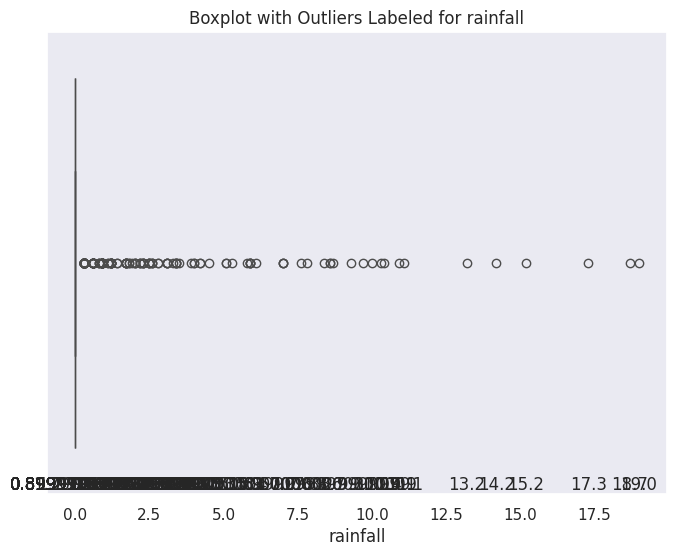


Outliers in column 'wind_speed':
 8        9.0
9        9.2
30      12.8
129      9.9
272      9.2
        ... 
2969     9.2
2972    16.2
2975    17.7
3203    10.8
3320    11.7
Name: wind_speed, Length: 158, dtype: float64
Number of outliers: 158


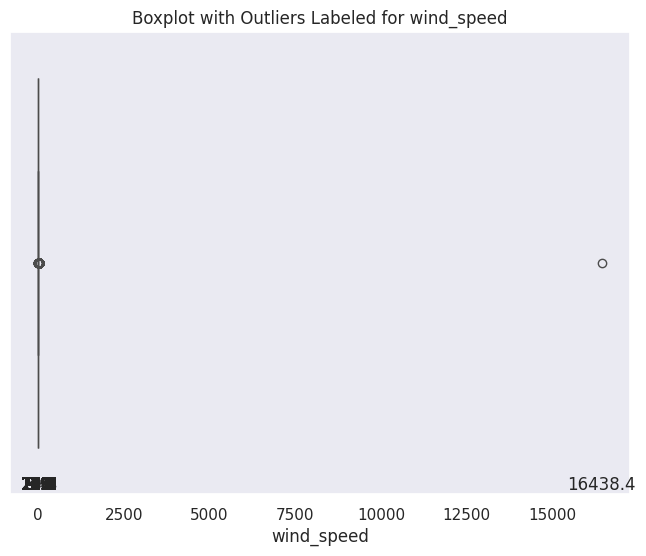

In [ ]:
#find outliers
columns_to_check = [ 'rainfall', 'wind_speed']

# Loop through the selected columns
for col in columns_to_check:
    # Calculate IQR
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_test[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)]
    print(f"\nOutliers in column '{col}':\n", outliers[col])
    print(f"Number of outliers: {len(outliers)}")

    # Create boxplot for this column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_test[col])

    # Add labels to the outliers
    for x in outliers[col]:
        plt.text(x, 0.5, x, ha='center', va='bottom')

    plt.title(f'Boxplot with Outliers Labeled for {col}')
    plt.xlabel(col)
    plt.show()



In [ ]:
df_test.sort_values(by = 'wind_speed', ascending = False)[:5]
# df_test = df_test.drop(df_test[df_test['wind_speed'] == 15094.3].index)
# df_test =df_test.drop(df_test[df_test['wind_speed'] == 14906.8].index)

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,month,day,hour
799,380704,3807,38,18.142499,103.806521,70.1,86.0,0.0,315.0,16438.4,7,5,12
2772,102601,1026,10,13.777972,100.569662,65.2,0.0,0.0,202.5,24.8,6,20,19
2949,102601,1026,10,13.777972,100.569662,61.2,61.0,0.0,292.5,24.4,5,26,13
2946,102601,1026,10,13.777972,100.569662,69.3,61.0,0.0,180.0,23.1,7,19,17
558,380704,3807,38,18.142499,103.806521,50.9,91.0,0.0,0.0,21.7,5,3,10


In [ ]:
#df_test =df_test.drop(df_test[df_test['wind_speed'] == 16438.4].index)
#if you drop this row, df_test will be smaller than submission file
# Calculate the median wind speed
median_wind_speed = df_test['wind_speed'].median()

# Replace outliers (wind_speed == 16438.4) with the median
df_test['wind_speed'] = df_test['wind_speed'].replace(16438.4, median_wind_speed)


In [ ]:
df_test.sort_values(by = 'rainfall', ascending = False)[:5]

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,rainfall,wind_direct,wind_speed,month,day,hour
3325,490706,4907,49,16.494229,104.350891,97.5,1.0,19.0,157.5,0.0,5,23,20
786,380704,3807,38,18.142499,103.806521,88.4,6.0,18.7,225.0,1.7,5,31,3
635,380704,3807,38,18.142499,103.806521,82.7,4.0,17.3,45.0,1.9,6,3,20
1063,330802,3308,33,14.533026,104.495172,96.8,29.0,15.2,135.0,5.3,7,30,17
2069,550404,5504,55,18.241106,100.690577,54.5,75.0,14.2,90.0,2.8,6,25,14


In [ ]:
df_test.isnull().sum()

tambon_code      0
amphur_code      0
province_code    0
latitude         0
longitude        0
humid            0
light            0
rainfall         0
wind_direct      0
wind_speed       0
month            0
day              0
hour             0
dtype: int64

## Modelling

In [ ]:
set(df_test) - set(train_df)

set()

In [ ]:
set(train_df) - set(df_test)

{'temp'}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_df.drop("temp", axis=1)
y = train_df["temp"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# #train with outliers
# X_train = train_df.select_dtypes(include=['number']).copy()
# X_train = X_train.drop(['temp'], axis=1)
# y_train = train_df["temp"]
# X_test  = df_test.select_dtypes(include=['number']).copy()

In [ ]:
# Filter and print rows with NaN values in y_train
nan_rows_y_train = y_train[y_train.isnull()]
print("Rows with NaN in y_train:\n", nan_rows_y_train)


# Filter and print rows with NaN values in X_train
nan_rows_X_train = X_train[X_train.isnull().any(axis=1)]
print("\nRows with NaN in X_train:\n", nan_rows_X_train)

# Filter and print rows with NaN values in X_train
nan_rows_X_test = X_test[X_test.isnull().any(axis=1)]
print("\nRows with NaN in X_test:\n", nan_rows_X_test)

Rows with NaN in y_train:
 Series([], Name: temp, dtype: float64)

Rows with NaN in X_train:
 Empty DataFrame
Columns: [tambon_code, amphur_code, province_code, latitude, longitude, humid, light, rainfall, wind_direct, wind_speed, month, day, hour]
Index: []

Rows with NaN in X_test:
 Empty DataFrame
Columns: [tambon_code, amphur_code, province_code, latitude, longitude, humid, light, rainfall, wind_direct, wind_speed, month, day, hour]
Index: []


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10906, 13), (10906,), (2727, 13), (2727,))

In [ ]:
!pip install optuna

In [ ]:
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error
def objective(trial):
    params = {
        'objective': 'reg:squarederror',  # Regression objective
        'eval_metric': 'rmse',  # Evaluation metric
        #'n_estimators': trial.suggest_int('n_estimators', 2000, 3000),
        'n_estimators':2963,
        'max_depth': trial.suggest_int('max_depth', 29, 40),
        'learning_rate': trial.suggest_float('learning_rate', 0.002, 0.009),
        #'learning_rate': 0.05,
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 10.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 250),
        'seed': trial.suggest_int('seed', 48, 888),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse  # Return the metric you want to optimize


In [ ]:
print(y_train.isnull().sum())  # Count NaN values in y_train
print(y_train.isnull().sum())   # Count NaN values in y_test


0
0


In [ ]:
!pip install cmaes

Defaulting to user installation because normal site-packages is not writeable
^C
ERROR: Operation cancelled by user


In [ ]:
# Using Multiple Callbacks in Optuna
import pickle


def save_best_model(study, trial):
    if study.best_trial.number == trial.number:
        best_params = study.best_params  # Get the best hyperparameters found so far
        best_model = xgb.XGBRegressor(**best_params)  # Create XGBoost model with best params
        best_model.fit(X_train, y_train)  # Fit the model

        # Save the model and its parameters to separate files (optional)
        with open("best_xgb_model_6.pkl", "wb") as model_file:
            pickle.dump(best_model, model_file)
        with open("best_xgb_params_6.pkl", "wb") as params_file:
            pickle.dump(best_params, params_file)


study = optuna.create_study(direction='minimize', sampler=optuna.samplers.CmaEsSampler())
#study = optuna.create_study(direction='minimize')
print(f"Sampler is {study.sampler.__class__.__name__}")
study.optimize(objective, n_trials=10, callbacks=[ save_best_model])

[I 2024-06-15 18:49:19,454] A new study created in memory with name: no-name-eb4023cf-2d6c-42dc-b427-b52a33890fc6


Sampler is CmaEsSampler


[W 2024-06-15 18:55:46,683] Trial 0 failed with parameters: {'max_depth': 31, 'learning_rate': 0.0029403513548644424, 'subsample': 0.7488498255510097, 'colsample_bytree': 0.9234454731153967, 'reg_alpha': 0.5807614218255297, 'reg_lambda': 4.501601555573283, 'min_child_weight': 124, 'seed': 533} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/ai4160/.local/lib/python3.10/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_35191/2428478610.py", line 22, in objective
    model.fit(X_train, y_train)
  File "/home/ai4160/.local/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/home/ai4160/.local/lib/python3.10/site-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/home/ai4160/.local/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "

KeyboardInterrupt: 

In [ ]:
#train_df['time'][0]

In [ ]:
df_test.shape

(3413, 13)

In [ ]:
!pwd

In [ ]:
pickled_model = pickle.load(open('best_xgb_model_6.pkl', 'rb'))
pickled_model.predict(X_test) #from train, test split

array([29.772581, 26.702608, 32.64445 , ..., 27.902975, 31.54009 ,
       25.690973], dtype=float32)

In [ ]:
y_pred = pickled_model.predict(df_test)
y_pred

array([26.206308, 27.84038 , 26.193205, ..., 27.243734, 25.697351,
       34.947563], dtype=float32)

In [ ]:
#y_pred_exp = np.expm1(y_pred)

In [ ]:
#print(y_pred_exp)

## Submission

In [ ]:
sub = pd.read_csv("IOT_Submit.csv")
sub

,id,temp
0,1,25.6
1,2,30.1
2,3,24.7
3,4,NaN
4,5,NaN
...,...,...
3408,3409,NaN
3409,3410,NaN
3410,3411,NaN
3411,3412,NaN


In [ ]:
sub_m = pd.DataFrame(y_pred, columns=['temp'])
sub_m

,temp
0,26.206308
1,27.840380
2,26.193205
3,29.865114
4,33.405983
...,...
3408,26.551182
3409,31.688715
3410,27.243734
3411,25.697351


In [ ]:
#sub_m["temp"] = np.expm1(sub_m["temp"])

In [ ]:
sub_m["id"] = sub_m.index+1
sub_m

,temp,id
0,26.206308,1
1,27.840380,2
2,26.193205,3
3,29.865114,4
4,33.405983,5
...,...,...
3408,26.551182,3409
3409,31.688715,3410
3410,27.243734,3411
3411,25.697351,3412


In [ ]:
sub_m.insert(0, 'id', sub_m.pop('id'))
sub_m  # Display the updated DataFrame

,id,temp
0,1,26.206308
1,2,27.840380
2,3,26.193205
3,4,29.865114
4,5,33.405983
...,...,...
3408,3409,26.551182
3409,3410,31.688715
3410,3411,27.243734
3411,3412,25.697351


In [ ]:
sub_m['temp'] = sub_m['temp'].apply(lambda x: f'{x:.2f}')  # Format as string with 2 decimal places
sub_m

,id,temp
0,1,26.21
1,2,27.84
2,3,26.19
3,4,29.87
4,5,33.41
...,...,...
3408,3409,26.55
3409,3410,31.69
3410,3411,27.24
3411,3412,25.70


In [ ]:
sub_m.to_csv('remove_outliers_standard_scaler_2.csv',index= False)

## TIme Series